In [1]:
%matplotlib inline

In [2]:
from PIL import Image, ImageFilter, ImageOps

import numpy as np
from matplotlib import pyplot as plt

from collections import deque

from cnocr import CnOcr

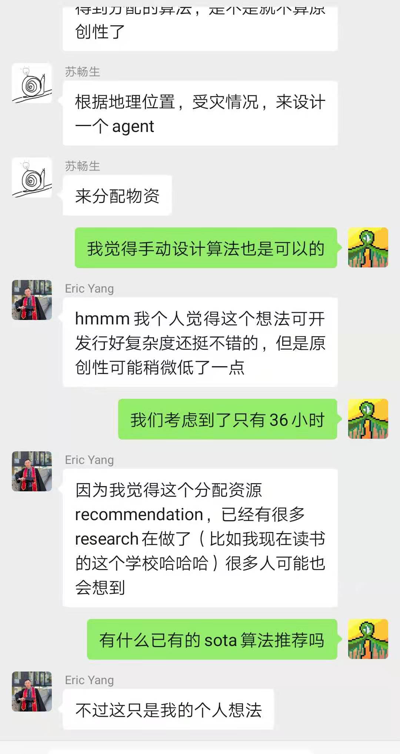

In [3]:
#Read image
filepath = '/Users/xieewenz/Downloads/testwecchatimage.jpeg'
im = Image.open( filepath )

resizeW = 400

W = im.width
H = im.height

im = im.resize((resizeW,int(H/W*resizeW)))
W = im.width
H = im.height
im = im.crop((0,H*0.08,W,H-H*0.05))

im

In [4]:





im_invert = ImageOps.invert(im)
new_im = im.convert('L')
g_im = np.array(new_im)
res_im = np.array(new_im)

# print(new_im.getpixel((0,0)))

W = im.width
H = im.height
 

In [5]:


c_count = []
 
percentagelog = []
for c in range(g_im.shape[1]):
    count = 0
    for r in range(g_im.shape[0]):
        if abs(g_im[r,c]-237)<5:
            count+=1
    if count/H > 0.95:
        c_count.append( c)
    percentagelog.append(count/H)

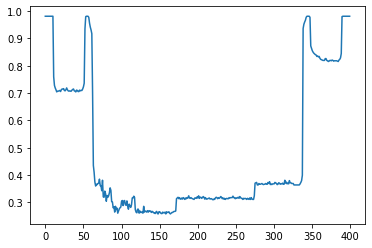

In [6]:
plt.plot(percentagelog)

In [7]:
# Image.fromarray(res_im)

In [8]:
last = 0
for i in c_count:
    if i>W/5 and last <W*4/5:
        print(i,last)
        cropright,cropleft = i,last
    last = i

339 58


In [9]:
cropim = im.crop((cropleft,0,cropright,H))
c_im = np.array(cropim)
c_im2 = np.array(cropim)


CW = cropim.width
CH = cropim.height

In [10]:








def is_valid(gridsize, vector, vis):
    max_r,max_c = gridsize
    r,c = vector
    if r<0 or r>=max_r or c<0 or c>=max_c:
        return False
    if vector in vis:
        return False
    return True
    

def BFS(grid, start):
    directions = (
        (-1,0),
        (1,0),
        (0,-1),
        (0,1)
    )
   
    vis = []
    q = []
    r,c = start
    
    min_r,min_c,max_r,max_c = r,c,r,c
    
    vis.append(start)
    q.append(start)
    
    while q:
        r,c = current = q.pop(0)
        vis.append(current)
        for d in directions:
            newvec = (r+d[0],c+d[1])
            if is_valid(grid.shape, newvec, vis) and not newvec in q and grid[newvec] == 1:
                q.append((r+d[0],c+d[1]))
#         print(r,c)
        if r>max_r: max_r = r
        if c>max_c: max_c = c
        if r<min_r: min_r = r
        if c<min_c: min_c = c
    
    return min_r,min_c,max_r,max_c
    
# grid = np.array([[0,0,0],
#                  [0,1,1],
#                  [0,1,0],
#                  [0,1,1]])

# BFS(bitmap,(230,200))
            



In [11]:
# bitmap[230,200]

In [12]:
def fillarr(arr,vec1,vec2):
    r1,c1 = vec1
    r2,c2 = vec2
    for rnum,r in enumerate(arr):
        for cnum,c in enumerate(r):
            if r1<=rnum<=r2 and c1<=cnum<=c2:
                arr[rnum,cnum]=2
#                 print(rnum,cnum)

def fillim(arr,vec1,vec2):
    r1,c1 = vec1
    r2,c2 = vec2
    for rnum,r in enumerate(arr):
        for cnum,c in enumerate(r):
            if r1<=rnum<=r2 and c1<=cnum<=c2:
                arr[rnum,cnum]=np.array([151,235,116])

# fillarr(grid,(1,1),(3,2))

# grid
    
    
    

In [13]:
# dist = numpy.linalg.norm(a-b)

bitmap = np.zeros((CH,CW))

for r in range(CH):
    count = 0
    for c in range(CW):
        color = c_im[r,c]
        if np.linalg.norm(color-np.array((151,235,116)))<25:
            c_im2[r,c] = (0,0,0)
            bitmap[r,c] = 1

In [14]:
rnum,cnum = 0,0
while rnum<bitmap.shape[0]:
    cnum=0
    while cnum<bitmap.shape[1]:

#         if rnum == 700 and cnum==500:print('wtf')
        if bitmap[rnum,cnum]!=0:
#             print('yo')
            min_r,min_c,max_r,max_c = BFS(bitmap,(rnum,cnum))
#             print(min_r,min_c,max_r,max_c)
            fillarr(bitmap,(min_r,min_c),(max_r,max_c))
            fillim(c_im,(min_r,min_c),(max_r,max_c))
            rnum=max_r
            cnum=bitmap.shape[1]
        cnum+=1
    rnum+=1
print(rnum,cnum)

754 281


In [15]:
# bitmap[700,500]

In [16]:
# bitmap.shape[0]

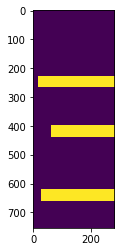

In [17]:
plt.imshow(bitmap)

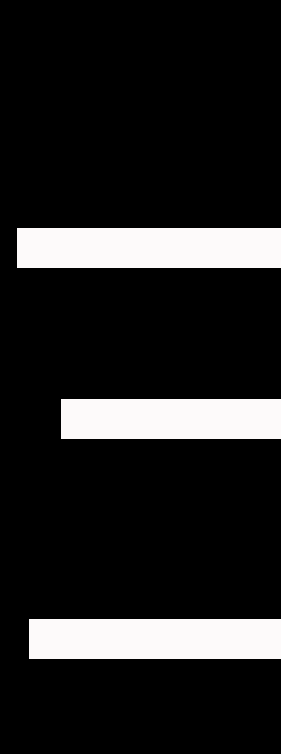

In [18]:
# Image.fromarray(bitmap*255)

from matplotlib import cm
Image.fromarray(np.uint8(cm.gist_earth(bitmap)*255))

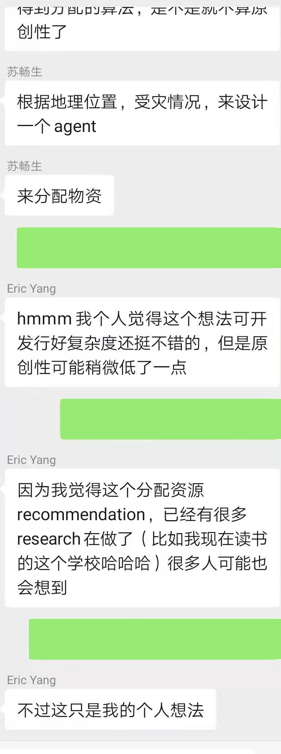

In [19]:
Image.fromarray(c_im)


In [20]:

ocr = CnOcr(name='def')
res = ocr.ocr(c_im)
print("Predicted Chars:")
for i in res:
    tot = "".join(i)
    print(tot)

Predicted Chars:
创性了
根据地理位置，受灾情况，来设计
一个agent
来分配物资
hmmm我个人觉得这个想法可开
发行好复杂度还挺不错的，但是原
创性可能稍微低了一点
因为我觉得这个分配资源
recommendation，已经有很多
research在做了（比如我现在读书
的这个学校哈哈哈）很多人可能也 
会想到
不过这只是我的个人想法


In [21]:



percentcounter = [0,0]
diffcounter = []
sep = []


for r in range(CH):
    count = 0
    for c in range(CW):
        color = c_im[r,c]
        if np.linalg.norm(color-np.array((255,255,255)))<10:
            c_im2[r,c] = (0,255,0)
            count+=1
    percentcounter.append(count/CW)
    
    diffcounter.append(abs(percentcounter[-1]-percentcounter[-2]))

    if len(percentcounter)>4 and percentcounter[-1]-(percentcounter[-2]+percentcounter[-3]+percentcounter[-4])/3>0.1 and min(percentcounter[-1],percentcounter[-2],percentcounter[-3],percentcounter[-4])<0.05:
        sep.append([r,0])
    if len(percentcounter)>4 and (percentcounter[-2]+percentcounter[-3]+percentcounter[-4])/3-percentcounter[-1]>0.1 and min(percentcounter[-1],percentcounter[-2],percentcounter[-3],percentcounter[-4])<0.05:
        sep.append([r,1])


In [22]:
sep2 = []
index = 0
while index<len(sep)-1:
    if sep[index+1][1]==sep[index][1]:
        sep.pop(index+1)
    else:
        index+=1
if sep[-1][1]==0:
    sep=sep[:-1]
error = False
for i in range(len(sep)-1):
    if sep[i]==sep[i+1]:
        error=True
assert not error
pairs = []
for i in range(0,len(sep)-1,2):
    pairs.append((sep[i][0],sep[i+1][0]))

In [23]:
lines = []
for pair in pairs:
    text =  ocr.ocr(c_im[pair[0]:pair[1],])
    line=[]
    for i in text:
        line.append("".join(i).strip())
    total = "".join(line).strip()
    lines.append(total)
    print(total)

创性了
根据地理位置，受灾情况，来设计一个agent
来分配物资
hmmm我个人觉得这个想法可开发行好复杂度还挺不错的，但是原创性可能稍微低了一点
因为我觉得这个分配资源recommendation，已经有很多research在做了（比如我现在读书的这个学校哈哈哈）很多人可能也会想到
不过这只是我的个人想法
